# 라이브러리 설치 및 호출

In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [25]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 121772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [38]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'NanumBarunGothic')

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 데이터 로드

In [74]:
## colab ##
df1 = pd.read_csv('/content/drive/MyDrive/202308_thesis/고민 매칭된이야기 평가지 A유형(응답)의 학생분들과 - 설문지 응답 시트1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/202308_thesis/고민 매칭된이야기 평가지 B유형(응답)의 학생분들과 - 설문지 응답 시트1.csv')

pre = pd.read_excel('/content/drive/MyDrive/리트리벌vs생성형-사전phq-통합정보.xlsx')
aft = pd.read_excel('/content/drive/MyDrive/사후조사(응답).xlsx')

# 데이터 분석:  설문지 응답 시트

### Runtime Error 제거

In [75]:
old_columns = df1.columns.tolist()
new_columns = ['날짜', '이메일', '만나이', '성별',
               '고민1', '매칭답변1', '매칭평가1', '표현강도1', '표현태도1',
               '위안정도1', '연관정도1', '매칭정도1', '문맥정도1',
               '고민2', '매칭답변2', '매칭평가2', '표현강도2', '표현태도2',
               '위안정도2', '연관정도2', '매칭정도2', '문맥정도2',
               '고민3', '매칭답변3', '매칭평가3', '표현강도3', '표현태도3',
               '위안정도3', '연관정도3', '매칭정도3', '문맥정도3',
               '종합만족도', '반복횟수', '추천의향', '만족이유', '만족답변', '불만족이유', '불만족답변']

rename_df1 = df1.rename(columns=dict(zip(old_columns, new_columns)))
rename_df1.head()

,날짜,이메일,만나이,성별,고민1,매칭답변1,매칭평가1,표현강도1,표현태도1,위안정도1,...,연관정도3,매칭정도3,문맥정도3,종합만족도,반복횟수,추천의향,만족이유,만족답변,불만족이유,불만족답변
0,2022. 12. 12 오후 8:19:52,chohyunkm@gmail.com,28,1,평소 한번 걱정을 하기 시작하면 끝도 없이 꼬리에 꼬리를 물고 걱정을 합니다.,경험링크에 들어가 고민 작성 후 클릭을 했는데 결과가 자꾸 이렇게 나옵니다. 카카오...,1,1,1,1,...,0,0,0,1,1,0,0,NaN,2,고민에 대한 결과를 보고 싶은데 자꾸 오류가 나서 불편해요.
1,2022. 12. 12 오후 10:21:19,parkjooha14@gmail.com,34,0,나를 싫어하는 사람들이 있을까 걱정이에요,RuntimeError: CUDA out of memory. Tried to all...,1,1,1,1,...,0,0,0,1,1,0,0,NaN,2,시스템 오류가 있는 듯 합니다. 어떤 문장을 쓰든간에 에러 문구가 뜨고 pc가 아닌...
2,2022. 12. 12 오후 10:29:36,nwm21d@gmail.com,25,1,취업 준비를 어떻게 해야할 지 모르겠어요,댓글:우선 자신이 하고 싶은 일을 찾아야 합니다. 그리고 그 분야에서 요구하는 역량...,5,5,4,2,...,0,0,1,4,3,6,1,NaN,0,NaN
3,2022. 12. 12 오후 10:46:29,hana31146381@gmail.com,36,1,불면증,불면증 수면장애,5,5,4,4,...,3,1,1,4,1,0,0,NaN,2,고쳐지지않음
4,2022. 12. 13 오전 10:05:56,silverain515@gmail.com,34,1,일이 안 구해집니다.,어떤 분들도 늦은 나이에 새로운 일을 하시는 분들도 있다고 해요. 그러니 OO님은 ...,4,4,5,4,...,2,0,1,4,4,7,2,아예 해결이 되는 답변은 아니지만 어느 정도 생각은 할 수 있게 해줌,0,NaN


In [76]:
old_columns2 = df2.columns.tolist()
new_columns2 = ['날짜', '이메일', '만나이', '성별',
               '고민1', '매칭답변1', '매칭평가1', '표현강도1', '표현태도1',
               '위안정도1', '연관정도1', '매칭정도1', '문맥정도1',
               '고민2', '매칭답변2', '매칭평가2', '표현강도2', '표현태도2',
               '위안정도2', '연관정도2', '매칭정도2', '문맥정도2',
               '고민3', '매칭답변3', '매칭평가3', '표현강도3', '표현태도3',
               '위안정도3', '연관정도3', '매칭정도3', '문맥정도3',
               '종합만족도', '반복횟수', '추천의향', '만족이유', '만족답변', '불만족이유', '불만족답변']

rename_df2 = df2.rename(columns=dict(zip(old_columns2, new_columns2)))
rename_df2.head()

,날짜,이메일,만나이,성별,고민1,매칭답변1,매칭평가1,표현강도1,표현태도1,위안정도1,...,연관정도3,매칭정도3,문맥정도3,종합만족도,반복횟수,추천의향,만족이유,만족답변,불만족이유,불만족답변
0,2022. 12. 12 오후 8:07:19,lshhs89@gmail.com,34,1,요즘 쉽게 짜증이 나고 예민해져서 다른 사람들한테 쉽게 화를 내요,댓글:자신의 감정을 잘 표현하지 못하는 것은 사회적으로 큰 문제가 될 수 있습니다....,2,2,3,2,...,2,1,1,3,3,6,2,찾아가서 상담하지 않고 비대면으로도 가능해서,2,정확한 답변이 아니고 내가 중심이 아닌 다른 이야기만 하는것 같음
1,2022. 12. 12 오후 8:08:06,dkdlwpskj@gmail.com,25,0,저는 학업스트레스 때문에 고민입니다,댓글: 저도 그랬어요. 하지만 그 스트레스를 풀려고 노력해보세요! 예를 들어 운동을...,4,4,5,4,...,3,1,1,4,4,6,0,NaN,1,NaN
2,2022. 12. 12 오후 8:14:19,dladpwl33@gmail.com,22,1,해야 할 일은 많은데 너무 나태해져 아무것도 안 하게 된다.,댓글:저는 해야 할 일이 있으면 그것을 다 끝내고 쉬는 편입니다. 하지만 다른 사람...,2,3,4,3,...,2,1,1,3,3,4,0,NaN,2,내 고민과 전혀 다른 답변이 나오는 것 같다.
3,2022. 12. 12 오후 8:29:07,csj113711@gmail.com,28,1,수면장애가 식이장애로까지 번져 건강이 악화됨을 생생하게 느끼고 있다.,"식이장애는 신체적, 정신적으로 매우 힘든 병입니다. 자신의 몸과 마음을 사랑하고 아...",4,4,5,4,...,3,1,1,4,4,6,2,누군가는 짧은 임팩트 있는 말에 힘을 얻기도 또 누군가는 자신의 마음을 어루만져 아...,2,문장 자체가 말이 안되는 것은 아니지만 사례인용이나 문구인용시에 갑자기 흐름이 깨져...
4,2022. 12. 12 오후 8:35:00,mozzizog3@gmail.com,이소현,1,"직장에서 인정받고 싶은데, 실력이 따라주질 않는다.",댓글:실력은 기본이고 인간관계가 중요하다. 사람을 대할 때는 진심으로 대하라. 그리...,4,4,5,2,...,1,1,1,3,4,2,0,NaN,2,내용이 너무 복사 붙여넣기고 끼워맞추기 인듯하다


In [77]:
print(rename_df1.shape, rename_df2.shape)

(631, 38) (542, 38)


In [78]:
# '매칭답변1', '매칭답변2', '매칭답변3' 중 'Runtime Error'를 포함하는 행 추출
filtered_df1 = rename_df1[rename_df1['매칭답변1'].str.contains('RuntimeError', na=False) | rename_df1['매칭답변2'].str.contains('RuntimeError', na=False) | rename_df1['매칭답변3'].str.contains('RuntimeError', na=False)]
filtered_df1

,날짜,이메일,만나이,성별,고민1,매칭답변1,매칭평가1,표현강도1,표현태도1,위안정도1,...,연관정도3,매칭정도3,문맥정도3,종합만족도,반복횟수,추천의향,만족이유,만족답변,불만족이유,불만족답변
0,2022. 12. 12 오후 8:19:52,chohyunkm@gmail.com,28,1,평소 한번 걱정을 하기 시작하면 끝도 없이 꼬리에 꼬리를 물고 걱정을 합니다.,경험링크에 들어가 고민 작성 후 클릭을 했는데 결과가 자꾸 이렇게 나옵니다. 카카오...,1,1,1,1,...,0,0,0,1,1,0,0,NaN,2,고민에 대한 결과를 보고 싶은데 자꾸 오류가 나서 불편해요.
1,2022. 12. 12 오후 10:21:19,parkjooha14@gmail.com,34,0,나를 싫어하는 사람들이 있을까 걱정이에요,RuntimeError: CUDA out of memory. Tried to all...,1,1,1,1,...,0,0,0,1,1,0,0,NaN,2,시스템 오류가 있는 듯 합니다. 어떤 문장을 쓰든간에 에러 문구가 뜨고 pc가 아닌...


In [79]:
# '매칭답변1', '매칭답변2', '매칭답변3' 중 'Runtime Error'를 포함하는 행 추출
filtered_df2 = rename_df2[rename_df2['매칭답변1'].str.contains('RuntimeError', na=False) | rename_df2['매칭답변2'].str.contains('RuntimeError', na=False) | rename_df2['매칭답변3'].str.contains('RuntimeError', na=False)]
filtered_df2[['매칭답변1', '매칭답변2', '매칭답변3']]

,매칭답변1,매칭답변2,매칭답변3


In [80]:
rename_df1 = rename_df1.drop([0, 1]).reset_index(drop=True)
rename_df1.head()

,날짜,이메일,만나이,성별,고민1,매칭답변1,매칭평가1,표현강도1,표현태도1,위안정도1,...,연관정도3,매칭정도3,문맥정도3,종합만족도,반복횟수,추천의향,만족이유,만족답변,불만족이유,불만족답변
0,2022. 12. 12 오후 10:29:36,nwm21d@gmail.com,25,1,취업 준비를 어떻게 해야할 지 모르겠어요,댓글:우선 자신이 하고 싶은 일을 찾아야 합니다. 그리고 그 분야에서 요구하는 역량...,5,5,4,2,...,0,0,1,4,3,6,1,NaN,0,NaN
1,2022. 12. 12 오후 10:46:29,hana31146381@gmail.com,36,1,불면증,불면증 수면장애,5,5,4,4,...,3,1,1,4,1,0,0,NaN,2,고쳐지지않음
2,2022. 12. 13 오전 10:05:56,silverain515@gmail.com,34,1,일이 안 구해집니다.,어떤 분들도 늦은 나이에 새로운 일을 하시는 분들도 있다고 해요. 그러니 OO님은 ...,4,4,5,4,...,2,0,1,4,4,7,2,아예 해결이 되는 답변은 아니지만 어느 정도 생각은 할 수 있게 해줌,0,NaN
3,2022. 12. 13 오전 10:07:02,chohyunkm@gmail.com,27,1,평소 한번 걱정을 하기 시작하면 끝도 없이 꼬리에 꼬리를 물고 걱정을 합니다.,저랑 비슷한 성격을 가지고 계시네요. 사실 소심한 성격 탓이 아닐 수 있어요. 다른...,2,4,4,2,...,3,1,1,2,4,1,0,NaN,2,현재의 다소 두루뭉술한 답변보다 좀 더 구체적인 해결법을 제시해줬으면 좋겠어요. \...
4,2022. 12. 13 오전 10:14:58,ppoo8752@gmail.com,33,1,"한번 화가나면 흥분, 좌절, 슬픔의 감정이 오래 가요",OO님을 응원하는 사람들이 많아요 용기 잃지 마시고 OO님의 몸에 상처를 내지 마세요,2,4,5,3,...,1,0,1,3,2,5,0,NaN,2,고민에 해당되는 답변이 아닌것 같고 영혼 없는 사무적인 느낌이라 공감받지 못한것 같...


In [81]:
print(len(rename_df1), len(rename_df2))

629 542


In [82]:
print(rename_df1['이메일'].nunique(), rename_df2['이메일'].nunique())

112 108


In [83]:
print(round(rename_df1['종합만족도'].mean(), 2))
print(round(rename_df2['종합만족도'].mean(), 2))

3.25
3.43


In [84]:
df1_day=rename_df1.groupby('이메일').size().sort_values(ascending=False)
df1_day=pd.DataFrame(df1_day)
df1_day.reset_index(inplace=True)
df1_day

,이메일,0
0,hana31146381@gmail.com,8
1,nwm21d@gmail.com,8
2,rlagmlfo89@gmail.com,8
3,ramses3k0608@gmail.com,8
4,kyunghyun.ahn@gmail.com,8
...,...,...
107,alswn67867@gmial.com,1
108,alswn67867@gamil.com,1
109,kaktalina98@dgu.ac.kr,1
110,m96268910@gmail.com\n,1


In [85]:
df1_day.columns = ['이메일', 'score']
df1_day

,이메일,score
0,hana31146381@gmail.com,8
1,nwm21d@gmail.com,8
2,rlagmlfo89@gmail.com,8
3,ramses3k0608@gmail.com,8
4,kyunghyun.ahn@gmail.com,8
...,...,...
107,alswn67867@gmial.com,1
108,alswn67867@gamil.com,1
109,kaktalina98@dgu.ac.kr,1
110,m96268910@gmail.com\n,1


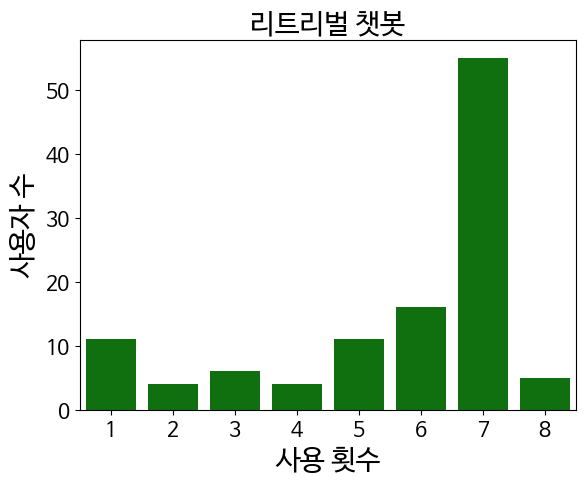

In [86]:
# 검색형 챗봇 사용 횟수 시각화
sns.countplot(data=df1_day,x='score',color='green')
plt.title('리트리벌 챗봇',fontsize=20)
plt.xlabel('사용 횟수',fontsize=20)
plt.ylabel('사용자 수',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [87]:
df2_day=rename_df2.groupby('이메일').size().sort_values(ascending=False)
df2_day=pd.DataFrame(df2_day)
df2_day.reset_index(inplace=True)
df2_day.columns = ['이메일', 'score']
df2_day

,이메일,score
0,mindongee2503@gmail.com,8
1,wjswlsghkd@gmail.com,8
2,cys20522@gmail.com,8
3,heea239@gmail.com,8
4,heoy9445@gmail.com,8
...,...,...
103,khj091955@gamil.com,1
104,a02092610352@gmail.com,1
105,jukjy@naver.com,1
106,ilhiyoung100@gmail.com\n,1


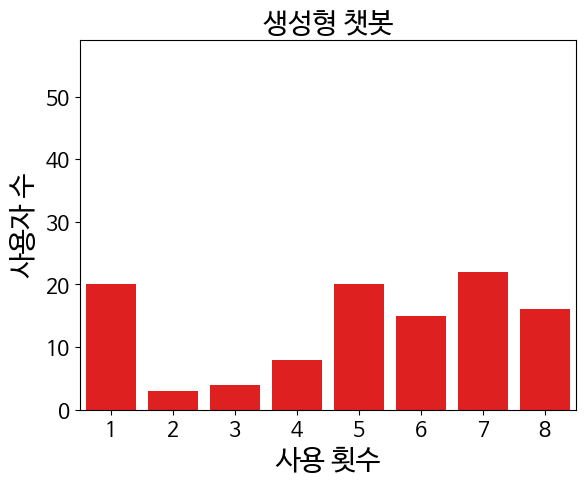

In [88]:
# 생성형 챗봇 사용 횟수 시각화
sns.countplot(data=df2_day,x='score',color='red')
plt.title('생성형 챗봇',fontsize=20)
plt.xlabel('사용 횟수',fontsize=20)
plt.ylabel('사용자 수',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 59)
plt.show()

In [89]:
print(rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==8].index)
print(rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==7].index)
print(rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==6].index)
print(rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==5].index)

Index(['hana31146381@gmail.com', 'kyunghyun.ahn@gmail.com', 'nwm21d@gmail.com',
       'ramses3k0608@gmail.com', 'rlagmlfo89@gmail.com'],
      dtype='object', name='이메일')
Index(['01021057560a@gmail.com', '0317soojin@gmail.com', '2umm3r5@gmail.com',
       'a533101015@gmail.com', 'aneechan97@gmail.com', 'boioletkim@gmail.com',
       'chohyunkm@gmail.com', 'cksal1014@gmail.com', 'dako6257@gmail.com',
       'djdlrgn45@gmail.com', 'dldmdgh10@gmail.com', 'dodrmf0511@gmail.com',
       'ehdrns28@gmail.com', 'ekfquf0226@gmail.com', 'emery7878@gmail.com',
       'gpgus93@gmail.com', 'hamyurim1@gmail.com', 'hursk0503@gmail.com',
       'hyo3621@gmail.com', 'iloveppang@gmail.com', 'ixxixxix9@gmail.com',
       'jghn90@gmail.com', 'jinft247@gmail.com', 'jy6529735@gmail.com',
       'kangaj006@gmail.com', 'kiciel7@gmail.com', 'kmdddj@gmail.com',
       'kys010609@gmail.com', 'lgman4852@gmail.com', 'lucyjeong0320@gmail.com',
       'lyg16339237@gmail.com', 'minhee0911@gmail.com',
       'minji11

In [90]:
df1_day8=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==8].index
df1_day7=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==7].index
df1_day6=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==6].index
df1_day5=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==5].index
df1_day4=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==4].index
df1_day3=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==3].index
df1_day2=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==2].index
df1_day1=rename_df1.groupby('이메일').size()[rename_df1.groupby('이메일').size()==1].index

df1_day8=rename_df1[rename_df1['이메일'].isin(df1_day8)]['종합만족도'].mean()
df1_day7=rename_df1[rename_df1['이메일'].isin(df1_day7)]['종합만족도'].mean()
df1_day6=rename_df1[rename_df1['이메일'].isin(df1_day6)]['종합만족도'].mean()
df1_day5=rename_df1[rename_df1['이메일'].isin(df1_day5)]['종합만족도'].mean()
df1_day4=rename_df1[rename_df1['이메일'].isin(df1_day4)]['종합만족도'].mean()
df1_day3=rename_df1[rename_df1['이메일'].isin(df1_day3)]['종합만족도'].mean()
df1_day2=rename_df1[rename_df1['이메일'].isin(df1_day2)]['종합만족도'].mean()
df1_day1=rename_df1[rename_df1['이메일'].isin(df1_day1)]['종합만족도'].mean()

df1_mean=[df1_day1, df1_day2, df1_day3, df1_day4, df1_day5, df1_day6, df1_day7, df1_day8]
dates = ['+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8']

In [91]:
df2_day8=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==8].index
df2_day7=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==7].index
df2_day6=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==6].index
df2_day5=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==5].index
df2_day4=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==4].index
df2_day3=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==3].index
df2_day2=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==1].index
df2_day1=rename_df2.groupby('이메일').size()[rename_df2.groupby('이메일').size()==2].index

df2_day8=rename_df2[rename_df2['이메일'].isin(df2_day8)]['종합만족도'].mean()
df2_day7=rename_df2[rename_df2['이메일'].isin(df2_day7)]['종합만족도'].mean()
df2_day6=rename_df2[rename_df2['이메일'].isin(df2_day6)]['종합만족도'].mean()
df2_day5=rename_df2[rename_df2['이메일'].isin(df2_day5)]['종합만족도'].mean()
df2_day4=rename_df2[rename_df2['이메일'].isin(df2_day4)]['종합만족도'].mean()
df2_day3=rename_df2[rename_df2['이메일'].isin(df2_day3)]['종합만족도'].mean()
df2_day2=rename_df2[rename_df2['이메일'].isin(df2_day2)]['종합만족도'].mean()
df2_day1=rename_df2[rename_df2['이메일'].isin(df2_day1)]['종합만족도'].mean()


df2_mean=[df2_day1, df2_day2, df2_day3, df2_day4, df2_day5, df2_day6, df2_day7, df2_day8]
dates = ['+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8']

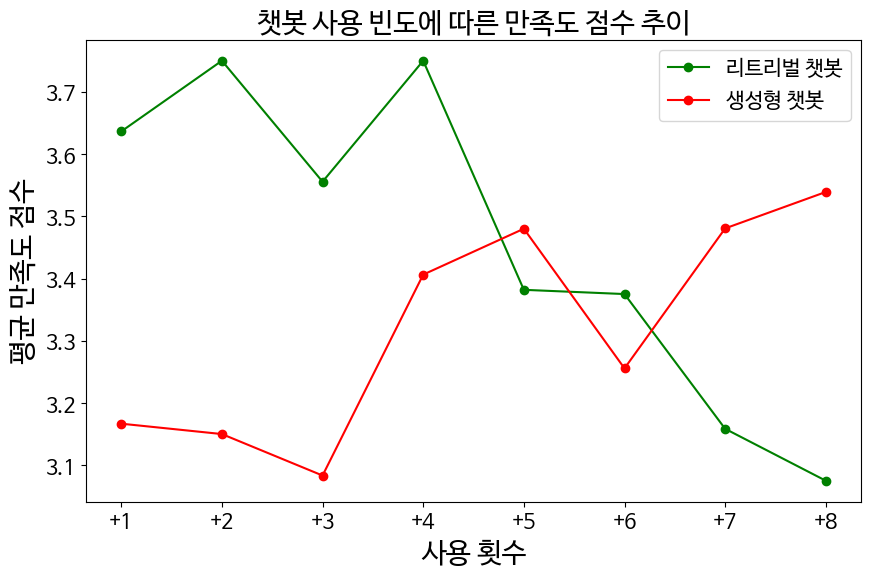

In [92]:
plt.figure(figsize=(10, 6))

# 검색형(리트리벌) 챗봇 만족도 점수 추이
plt.plot(dates, df1_mean, marker='o', linestyle='-', color='g', label='리트리벌 챗봇')
# 생성형 챗봇 만족도 점수 추이
plt.plot(dates, df2_mean, marker='o', linestyle='-', color='r', label='생성형 챗봇')

plt.title('챗봇 사용 빈도에 따른 만족도 점수 추이', fontsize=20)
plt.xlabel('사용 횟수', fontsize=20)
plt.ylabel('평균 만족도 점수', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})

plt.show()

# 데이터 분석: 사전, 사후 응답 시트

In [93]:
pre.rename(columns={'구글 이메일\n * 구글 독스 활용한 작업이 있어, 구글 이메일만 가능\n * \'OOO@gmail.com\'의 완전한 이메일 형식으로 작성':'email'},inplace=True)

In [94]:
aft.rename(columns={'구글 이메일\n* 작업 지원 시 기입했던 메일\n* \'OOO@gmail.com\'의 완전한 이메일 형식으로 작성':'email'},inplace=True)


In [95]:
pre = pre.loc[(pre['사전설문(이메일)']==1)&(pre['사후평가']==1)&(pre['동의서']==1)]

In [96]:
pre.shape

(157, 19)

In [97]:
pre = pre.drop_duplicates(subset=['email'], keep='last')
aft = aft.drop_duplicates(subset=['email'], keep='last')


In [98]:
pre_score = pre['사전 총점']
aft_score = aft['사후 종점']

In [99]:
pre.shape, aft.shape

((157, 19), (184, 44))

In [100]:
df = pd.merge(pre,aft, how='left',on='email')

In [101]:
df.shape

(157, 62)

In [102]:
df.rename(columns={'사후 종점':'사후 총점'},inplace=True)

In [103]:
score=df[['email','사전 총점', '사후 총점']]
score.dropna(inplace=True)
score['사전 총점'] = score['사전 총점'].astype(int)


In [104]:
score.shape

(134, 3)

In [105]:
score.reset_index(inplace=True,drop=True)

In [106]:
score['총점 차이'] = score['사후 총점'] -  score['사전 총점']

In [107]:
score.head()

,email,사전 총점,사후 총점,총점 차이
0,21xxx31@gmail.com,10,9.0,-1.0
1,jinalee880@gmail.com,21,26.0,5.0
2,tirumaram@gmail.com,14,25.0,11.0
3,hursk0503@gmail.com,11,9.0,-2.0
4,winny8801@gmail.com,18,11.0,-7.0


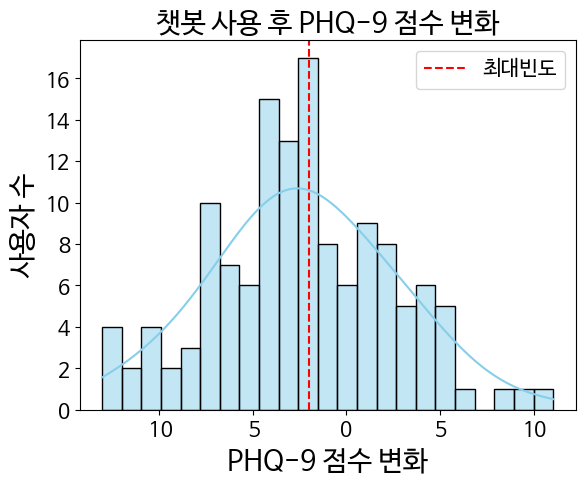

In [108]:
score_cha = score['총점 차이'].value_counts().sort_index(ascending=False)
ax = sns.histplot(x=score_cha.index, weights=score_cha.values, color="skyblue", bins=len(score_cha), kde=True)

# 최대빈도
max_freq_bin = score_cha.idxmax()
ax.axvline(x=max_freq_bin, color='red', linestyle='--', label='최대빈도')

plt.title('챗봇 사용 후 PHQ-9 점수 변화', fontsize=20)
plt.xlabel('PHQ-9 점수 변화',fontsize=20)
plt.ylabel('사용자 수',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15})
plt.show()